In [1]:
import pathlib, os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

import numpy as np
#import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
os.listdir('/kaggle/input/malayakew-plant-leaf-dataset/MK')

['D2', 'readMe.txt', 'D1', 'name_of_spesies.txt']

In [3]:
#DATA preparation
# Names
train_path = "/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/train_patch"

import re

path = r'/kaggle/input/malayakew-plant-leaf-dataset/MK/name_of_spesies.txt'
species = []
f = open(path, 'r')

# Inserting species and class id in an array
for line in f.readlines():
    species_name = re.split('\)', line.rstrip())[1]
    species_id = re.findall(r'\d+', line)[0]
    species.append([species_id, species_name])

print(species)

[['1', 'q_aff_cerris'], ['2', 'q_rubur_f_purpubascens'], ['3', 'q_x_hispanica'], ['4', 'q_x_kewensis'], ['5', 'q_x_ludoviciana'], ['6', 'q_x_mannifera'], ['7', 'q_x_rosacea'], ['8', 'q_x_turneri'], ['9', 'qacutissima'], ['10', 'qagriefolia'], ['11', 'qagrifolia'], ['12', 'qarkansana'], ['13', 'qboissieri'], ['14', 'qcanariensis'], ['15', 'qcastaneifolia'], ['16', 'qcerris'], ['17', 'qellipsoidalis'], ['18', 'qfrainetto'], ['19', 'qhartwissiana'], ['20', 'qhemisphaerica'], ['21', 'qhybrid'], ['22', 'qilex'], ['23', 'qinfectoria'], ['24', 'qithaburensis'], ['25', 'qlaurifolia'], ['26', 'qlobata'], ['27', 'qmacransmera'], ['28', 'qmarilandica'], ['29', 'qoxyodon'], ['30', 'qpetraea'], ['31', 'qpetraer_fmespilikolia'], ['32', 'qphellos'], ['33', 'qpubescens'], ['34', 'qreticulata'], ['35', 'qrhysophylla'], ['36', 'qrobur'], ['37', 'qrotundifolia'], ['38', 'qrubra'], ['39', 'qrulstra_aurea'], ['40', 'qserrata'], ['41', 'qshumardii'], ['42', 'qtrotana'], ['43', 'quercus'], ['44', 'qvariabili

In [4]:
dir = r'/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/train_patch'

# Accessing the images from each folder based on species.
for value in species:
    path = dir + '/Class' + value[0]
    print(value[1], len(os.listdir(path)))
    value.append(len(os.listdir(path)))

    for img in os.listdir(path):
        fpath = path + "/" + img

q_aff_cerris 788
q_rubur_f_purpubascens 788
q_x_hispanica 788
q_x_kewensis 788
q_x_ludoviciana 788
q_x_mannifera 788
q_x_rosacea 788
q_x_turneri 788
qacutissima 788
qagriefolia 788
qagrifolia 788
qarkansana 788
qboissieri 788
qcanariensis 788
qcastaneifolia 788
qcerris 788
qellipsoidalis 788
qfrainetto 788
qhartwissiana 788
qhemisphaerica 788
qhybrid 788
qilex 788
qinfectoria 788
qithaburensis 788
qlaurifolia 788
qlobata 788
qmacransmera 788
qmarilandica 788
qoxyodon 788
qpetraea 788
qpetraer_fmespilikolia 788
qphellos 788
qpubescens 788
qreticulata 788
qrhysophylla 788
qrobur 788
qrotundifolia 788
qrubra 788
qrulstra_aurea 788
qserrata 788
qshumardii 788
qtrotana 788
quercus 788
qvariabilis 788


(256, 256, 3)


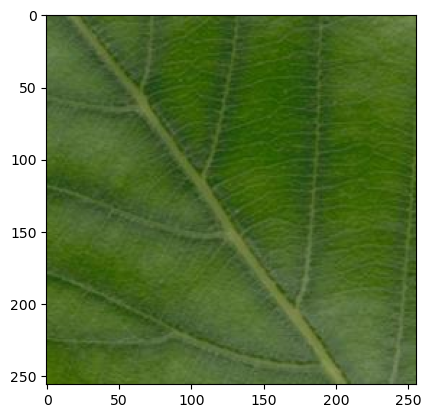

In [5]:
train_img = plt.imread('/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/train_patch/Class1/Class1(1)R0_00003.jpg')
print (train_img.shape)
plt.imshow(train_img)

In [6]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:

from efficientnet.tfkeras import EfficientNetB0

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [9]:
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/train_patch',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/test_patch',
    target_size=(256,256),
    batch_size=64,
    class_mode='categorical')

Found 34672 images belonging to 44 classes.
Found 8800 images belonging to 44 classes.


In [10]:
checkpoint_path = "/kaggle/working/EfficientnetB0.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_path,
                                verbose=1,
                                save_weights_only=True,
                                period=2)
]

In [11]:
# Define the image size and number of classes
img_size = (256, 256)
num_classes = 44

In [12]:
# Create the EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, input_shape=(img_size[0], img_size[1], 3), weights='imagenet')

# Freeze the pre-trained layers
base_model.trainable = False

# Add the classification layers
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

16804768/16804768 [==============================] - 0s 0us/step


In [13]:
# Compile the model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit_generator(train_generator,
                              epochs=75,
                              validation_data=test_generator,
                               callbacks=callbacks,
                               #initial_epoch=history1.epoch[-1],
                              verbose=1)

/tmp/ipykernel_32/2162853254.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/75


2023-11-04 08:20:21.695991: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


542/542 [==============================] - 224s 392ms/step - loss: 2.6227 - accuracy: 0.2805 - val_loss: 1.3897 - val_accuracy: 0.6434
Epoch 2/75
542/542 [==============================] - ETA: 0s - loss: 1.6288 - accuracy: 0.5173
Epoch 2: saving model to /kaggle/working/EfficientnetB0.ckpt
542/542 [==============================] - 131s 241ms/step - loss: 1.6288 - accuracy: 0.5173 - val_loss: 0.9296 - val_accuracy: 0.7422
Epoch 3/75
542/542 [==============================] - 130s 240ms/step - loss: 1.3470 - accuracy: 0.5955 - val_loss: 0.7856 - val_accuracy: 0.7836
Epoch 4/75
542/542 [==============================] - ETA: 0s - loss: 1.1994 - accuracy: 0.6369
Epoch 4: saving model to /kaggle/working/EfficientnetB0.ckpt
542/542 [==============================] - 131s 241ms/step - loss: 1.1994 - accuracy: 0.6369 - val_loss: 0.6657 - val_accuracy: 0.8144
Epoch 5/75
542/542 [==============================] - 129s 239ms/step - loss: 1.0925 - accuracy: 0.6663 - val_loss: 0.5786 - val_accura

In [15]:
# Load the weights from the last checkpoint
model.load_weights(checkpoint_path)

In [16]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=test_generator,
                               callbacks=callbacks,
                               #initial_epoch=history.epoch[-1],
                              verbose=1)

/tmp/ipykernel_32/3299565415.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
542/542 [==============================] - 120s 222ms/step - loss: 0.4867 - accuracy: 0.8488 - val_loss: 0.1920 - val_accuracy: 0.9390
Epoch 2/10
542/542 [==============================] - ETA: 0s - loss: 0.4950 - accuracy: 0.8453
Epoch 2: saving model to /kaggle/working/EfficientnetB0.ckpt
542/542 [==============================] - 124s 229ms/step - loss: 0.4950 - accuracy: 0.8453 - val_loss: 0.1895 - val_accuracy: 0.9400
Epoch 3/10
542/542 [==============================] - 121s 224ms/step - loss: 0.4923 - accuracy: 0.8464 - val_loss: 0.1969 - val_accuracy: 0.9360
Epoch 4/10
542/542 [==============================] - ETA: 0s - loss: 0.4896 - accuracy: 0.8485
Epoch 4: saving model to /kaggle/working/EfficientnetB0.ckpt
542/542 [==============================] - 124s 228ms/step - loss: 0.4896 - accuracy: 0.8485 - val_loss: 0.1876 - val_accuracy: 0.9425
Epoch 5/10
542/542 [==============================] - 118s 218ms/step - loss: 0.4801 - accuracy: 0.8490 - val_loss: 0.1750 -

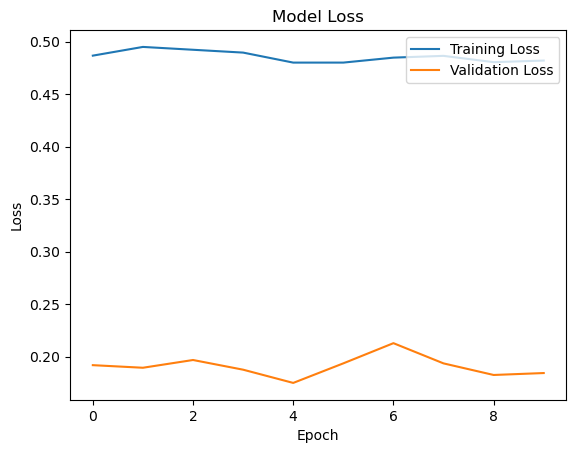

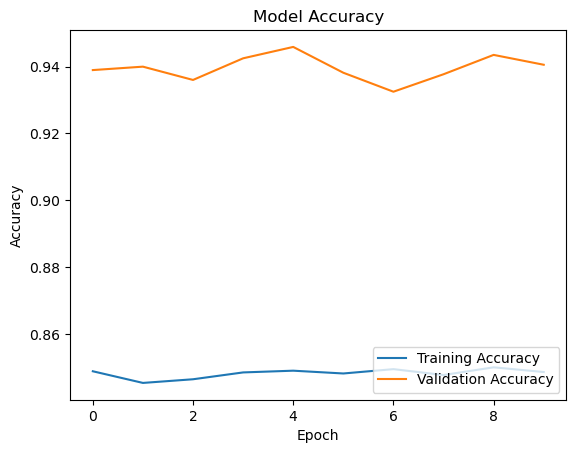

In [17]:
# Plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [23]:
# ...
# After training, use the model to make predictions on test data
predictions = model.predict(test_generator)


   
# Define a dictionary to map class indices to class names starting from index 1
class_labels = {
    1: 'q_aff_cerris',
    2: 'q_rubur_f_purpubascens',
    3: 'q_x_hispanica',
    4: 'q_x_kewensis',
    5: 'q_x_ludoviciana',
    6: 'q_x_mannifera',
    7: 'q_x_rosacea',
    8: 'q_x_turneri',
    9: 'qacutissima',
    10: 'qagriefolia',
    11: 'qagrifolia',
    12: 'qarkansana',
    13: 'qboissieri',
    14: 'qcanariensis',
    15: 'qcastaneifolia',
    16: 'qcerris',
    17: 'qellipsoidalis',
    18: 'qfrainetto',
    19: 'qhartwissiana',
    20: 'qhemisphaerica',
    21: 'qhybrid',
    22: 'qilex',
    23: 'qinfectoria',
    24: 'qithaburensis',
    25: 'qlaurifolia',
    26: 'qlobata',
    27: 'qmacransmera',
    28: 'qmarilandica',
    29: 'qoxyodon',
    30: 'qpetraea',
    31: 'qpetraer_fmespilikolia',
    32: 'qphel',
    33: 'qpubescens',
    34: 'qreticulata',
    35: 'qrhysophylla',
    36: 'qrobur',
    37: 'qrotundifolia',
    38: 'qrubra',
    39: 'qrulstra_aurea',
    40: 'qserrata',
    41: 'qshumardii',
    42: 'qtrotana',
    43: 'quercus',
    44: 'qvariabilis'
}

# Loop through the predictions and print the results with class names and indices starting from 1
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction) + 1  # Add 1 to start from 1
    predicted_class = class_labels[predicted_class_index]
    probability = prediction[predicted_class_index - 1]  # Subtract 1 to get the correct index
    
    print(f"Image {i + 1}: Predicted Class Index: {predicted_class_index}, Predicted Class: {predicted_class}, Probability: {probability:.4f}")



138/138 [==============================] - 23s 166ms/step
Image 1: Predicted Class Index: 9, Predicted Class: qacutissima, Probability: 1.0000
Image 2: Predicted Class Index: 27, Predicted Class: qmacransmera, Probability: 1.0000
Image 3: Predicted Class Index: 41, Predicted Class: qshumardii, Probability: 0.9964
Image 4: Predicted Class Index: 20, Predicted Class: qhemisphaerica, Probability: 0.9355
Image 5: Predicted Class Index: 6, Predicted Class: q_x_mannifera, Probability: 0.9938
Image 6: Predicted Class Index: 41, Predicted Class: qshumardii, Probability: 1.0000
Image 7: Predicted Class Index: 29, Predicted Class: qoxyodon, Probability: 0.9711
Image 8: Predicted Class Index: 18, Predicted Class: qfrainetto, Probability: 0.9997
Image 9: Predicted Class Index: 17, Predicted Class: qellipsoidalis, Probability: 0.9905
Image 10: Predicted Class Index: 29, Predicted Class: qoxyodon, Probability: 0.8390
Image 11: Predicted Class Index: 8, Predicted Class: q_x_turneri, Probability: 0.98

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Replace 'image_path' with the path to your single image
image_path = "//kaggle/input/sample-data/Class12R315_00268.jpg"

# Load the image
img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# Make predictions for the single image
predictions = model.predict(img)

# Define a dictionary to map class indices to class names starting from index 1
class_labels = {
    1: 'q_aff_cerris',
    2: 'q_rubur_f_purpubascens',
    3: 'q_x_hispanica',
    4: 'q_x_kewensis',
    5: 'q_x_ludoviciana',
    6: 'q_x_mannifera',
    7: 'q_x_rosacea',
    8: 'q_x_turneri',
    9: 'qacutissima',
    10: 'qagriefolia',
    11: 'qagrifolia',
    12: 'qarkansana',
    13: 'qboissieri',
    14: 'qcanariensis',
    15: 'qcastaneifolia',
    16: 'qcerris',
    17: 'qellipsoidalis',
    18: 'qfrainetto',
    19: 'qhartwissiana',
    20: 'qhemisphaerica',
    21: 'qhybrid',
    22: 'qilex',
    23: 'qinfectoria',
    24: 'qithaburensis',
    25: 'qlaurifolia',
    26: 'qlobata',
    27: 'qmacransmera',
    28: 'qmarilandica',
    29: 'qoxyodon',
    30: 'qpetraea',
    31: 'qpetraer_fmespilikolia',
    32: 'qphel',
    33: 'qpubescens',
    34: 'qreticulata',
    35: 'qrhysophylla',
    36: 'qrobur',
    37: 'qrotundifolia',
    38: 'qrubra',
    39: 'qrulstra_aurea',
    40: 'qserrata',
    41: 'qshumardii',
    42: 'qtrotana',
    43: 'quercus',
    44: 'qvariabilis'
}

# Convert the predicted class index to match the dictionary
predicted_class_index = np.argmax(predictions) + 1
predicted_class = class_labels[predicted_class_index]
probability = predictions[0][predicted_class_index - 1]

print(f"Predicted Class: {predicted_class}, Probability: {probability:.4f}")


1/1 [==============================] - 0s 27ms/step
Predicted Class: qarkansana, Probability: 1.0000
